In [36]:
import pandas as pd
# from nltk.metrics.agreement import AnnotationTask
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa
from IPython.display import display
import matplotlib.pyplot as plt

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Examine annotations

In [5]:
annotations = {}
names = ['Coda', 'Shen', 'Yoder']
for name in names:
    annotations[name] = pd.read_csv(f'~/school/11-830/hw2/common1_{name}_annotated.csv') # For common1
#     annotations[name] = pd.read_csv(f'~/school/11-830/hw2/common2_{name}_annotated.csv') # For common2

annotations['Yoder'].columns

Index(['speakerhidden', 'PosterTone', 'ExpertiseScale',
       'EncouragingDiscouraging', 'RespectfulDisrespectful', 'gender',
       'talkid'],
      dtype='object')

In [11]:
pd.set_option('display.max_colwidth', -1)

In [25]:
# col = 'ExpertiseScale'
# col = 'EncouragingDiscouraging'
col = 'PosterTone'
cols = np.array([annotations['Yoder']['speakerhidden'].tolist()] + [annotations[name][col].tolist() for name in names]).T
pd.DataFrame(cols, columns=['speakerhidden'] + [name for name in names])
# for name in names:
#     display(annotations[name].loc[:, ['speakerhidden', col]])

,speakerhidden,Coda,Shen,Yoder
0,"my advice, just quit your jobs, and become a fanatical stephan harris groupie, following them everywhere. i just want to hang out, and forget everything else. drink fresh dark coffee, and drift away, on the frequencies. ya dig daddy o.",None,None,None
1,"finally! it's about time people start realizing that ""government"" simply doesn't work. using force to get people to do, or not do, things always has detrimental unintended consequences. they have to want it as much as you do. (you attract more flies with honey, etc.)",None,None,None
2,i loved this talk. but if the liar knows what signs give him away won't he become a better liar?,None,None,None
3,"<br><span class=""highlighted"" data-timestamp=""1518883823361"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">this is a great guy</span>. i still can't believe how is it possible to build streets with no sidewalks... in europe it's unbelievable. it's like shooting yourself in the knee. sounds like building a prison. where did your democracy go, guys?",Strongly Positive,Strongly Positive,Positive
4,"<br>i think this could be true, but thinking this way, also leads to the fact that, <span class=""highlighted"" data-timestamp=""1518883865655"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">he also is experiencing a bias in his believes</span>, wich makes it the 5 stories we tell ourselvs.",None,Neutral,Positive
5,"<br>this is a very interesting talk. <span class=""highlighted"" data-timestamp=""1518883887867"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">i wish he explains more about his discovery</span>. anyways, does this mean that in every family there will be bad news at some point? hmm...",None,None,Positive
6,"but alan, how are organizations supposed to make/save money if they don't trick most of their end users?",Neutral,None,Neutral
7,"“do not strain your eyes in longing for the things that we have given to some groups of them to enjoy, the splendour of the life of this world through which we test them. the provision of your lord is better and more lasting.” (quran 20:131)",None,None,Neutral
8,"remember that a few years ago, you play albums backwards there are satanic messages? let me tell you something, if you've ever sat around playing your albums backwards, you are satan. bill hicks :)",None,Strongly Negative,Neutral
9,"phil, i also am an artist (and an art teacher) with a tremor in my right hand. i would love to talk to you about your journey! iteachart2000@yahoo.com",Strongly Positive,Strongly Positive,None


In [26]:
# Look at difference in highlights

col = 'speakerhidden'
cols = np.array([annotations[name][col].tolist() for name in names]).T
pd.DataFrame(cols, columns=[name for name in names])
# for name in names:
#     display(annotations[name].loc[:, ['speakerhidden', col]])

,Coda,Shen,Yoder
0,"<br><span class=""highlighted"" data-timestamp=""1518907862188"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">my advice</span>, just quit your jobs, and become a fanatical stephan harris groupie, following them everywhere. i just want to hang out, and forget everything else. drink fresh dark coffee, and drift away, on the frequencies. ya dig daddy o.","my advice, just quit your jobs, and become a fanatical stephan harris groupie, following them everywhere. i just want to hang out, and forget everything else. drink fresh dark coffee, and drift away, on the frequencies. ya dig daddy o.","my advice, just quit your jobs, and become a fanatical stephan harris groupie, following them everywhere. i just want to hang out, and forget everything else. drink fresh dark coffee, and drift away, on the frequencies. ya dig daddy o."
1,"<br><span class=""highlighted"" data-timestamp=""1518907894200"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">finally</span>! it's about time people start realizing that ""government"" simply doesn't work. using force to get people to do, or not do, things always has detrimental unintended consequences. they have to want it as much as you do. (you attract more flies with honey, etc.)","finally! it's about time people start realizing that ""government"" simply doesn't work. using force to get people to do, or not do, things always has detrimental unintended consequences. they have to want it as much as you do. (you attract more flies with honey, etc.)","finally! it's about time people start realizing that ""government"" simply doesn't work. using force to get people to do, or not do, things always has detrimental unintended consequences. they have to want it as much as you do. (you attract more flies with honey, etc.)"
2,"<br><span class=""highlighted"" data-timestamp=""1518907922032"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">i loved </span>this talk. but if the liar knows what signs give him away won't he become a better liar?",i loved this talk. but if the liar knows what signs give him away won't he become a better liar?,i loved this talk. but if the liar knows what signs give him away won't he become a better liar?
3,"<br><span class=""highlighted"" data-timestamp=""1518907950558"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">this is a great guy.</span> i still can't believe how is it possible to build streets with no sidewalks... in europe it's unbelievable. it's like shooting yourself in the knee. sounds like building a prison. where did your democracy go, guys?","<br><span class=""highlighted"" data-timestamp=""1518901054301"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">this is a great guy.</span> i still can't believe how is it possible to build streets with no sidewalks... in europe it's unbelievable. it's like shooting yourself in the knee. sounds like building a prison. where did your democracy go, guys?","<br><span class=""highlighted"" data-timestamp=""1518883823361"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">this is a great guy</span>. i still can't believe how is it possible to build streets with no sidewalks... in europe it's unbelievable. it's like shooting yourself in the knee. sounds like building a prison. where did your democracy go, guys?"
4,"<br><span class=""highlighted"" data-timestamp=""1518907993216"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">i thin</span>k this could be true, but thinking this way, also leads to the fact that, he also is experiencing a bias in his believes, wich makes it the 5 stories we tell ourselvs.","<br>i think this could be true, but thinking this way, also leads to the fact that, <span class=""highlighted"" data-timestamp=""1518901083339"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">he also is experie

# Analyze respect wrt gender

In [27]:
# Load data
annote100 = pd.read_csv('/home/michael/school/11-830/hw2/Michael_annotated.csv')
annote100.columns

Index(['speakerhidden', 'PosterTone', 'ExpertiseScale',
       'EncouragingDiscouraging', 'RespectfulDisrespectful', 'gender',
       'talkid'],
      dtype='object')

In [31]:
# Load data
data100 = pd.read_csv('/home/michael/school/11-830/hw2/Michael.csv')
data100.columns

Index(['gender', 'comment', 'talkid', 'videourl'], dtype='object')

In [28]:
annote100

,speakerhidden,PosterTone,ExpertiseScale,EncouragingDiscouraging,RespectfulDisrespectful,gender,talkid
0,"<br>except that researchers in hawaii and israel have found that the bees are dying out because of a virus. this research was published only a year before her talk, though, <span class=""highlighted"" data-timestamp=""1518885381424"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">so i guess she can be excused</span>. http://www.sciencedaily.com/releases/2012/06/120607142357.htm http://www.israelnationalnews.com/news/news.aspx/168978#.ujkvmgsgl1k",Negative,STEM degree,Discouraging,Neutral,female,594
1,the extend that people care about slavery is the same as the distance from themselves and their monitor. so much careness! lets pray and maybe god will help! yeah thats it!,None,No degree,Encouraging,Respectful,female,859
2,"<br><span class=""highlighted"" data-timestamp=""1518885452590"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">there is one intelligent and courageous woman. though i still think someone should tell her that applauding for yourself is considered blasphemy</span> in britain.",Positive,No degree,Encouraging,Respectful,female,1637
3,"great idea... not everyone knows what kind health service is available and how to access them. one of my friends was once looking for a counselling for his husband's anxiety and aggressive behaviour in their own language, but ended with disappointment......people in need need to information",None,No degree,Encouraging,Respectful,female,912
4,"awesome, my father over 80 he do up & down 6 storied building every day. i thought it may be dangerous to him. now i come to know that it is help him to build new neuron is it true?",None,No degree,Encouraging,Respectful,female,113
5,"it's so excting. specsially, ""men lie eight times more about themselves than they do other people. women lie more to protect other people."" is interested. because i think that each other are opposited",Positive,No degree,Encouraging,Respectful,female,1092
6,"18 - at length, when they came to a valley of ants. one of the ants said: o ye ants, get into your habitations, lest solomon and his hosts crush you (under foot) without knowing it."". nobile qura'an. (the book of muslims)",None,No degree,Encouraging,Respectful,female,1914
7,"do it, my mother had a wieght problem. some docter perscriber her a med that she is now addicted to. she is no longer mentaly sound. we need to fix this problem.",None,No degree,Encouraging,Respectful,female,912
8,"what really makes people hesitate to go forward is a sense of guilty or drawbacks. i know overcoming them is unaviodable step in our lives, but it's quite hard. embrace all my things regardless of their value. i am sure open mind for eveything beside me will push me forward.",None,No degree,Encouraging,Respectful,female,1287
9,"<br>strange, <span class=""highlighted"" data-timestamp=""1518885601128"" style=""background-color: rgb(255, 255, 123);"" data-highlighted=""true"">she calls it hacking but we already had some fine words for that</span>. for example 'taking responsibility'. and of course citizens who take responsibility are good citizens right? ps: i completely agree with her talk",Positive,No degree,Encouraging,Respectful,female,489


In [32]:
# annote100['gender'].tolist().count('female')
data100['gender'].tolist().count('female')

100

In [35]:
# Respect category counts
cat_counts = {val: annote100['RespectfulDisrespectful'].tolist().count(val) for val in annote100['RespectfulDisrespectful'].unique()}
cat_counts

{'Disrespectful': 9, 'Neutral': 9, 'Respectful': 83}

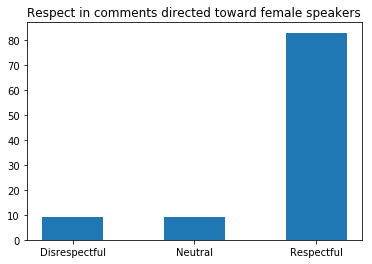

In [49]:
%matplotlib inline

labels = ['Disrespectful', 'Neutral', 'Respectful']
values = [cat_counts[l] for l in labels]
indices = np.arange(len(labels))
width = 0.5
plt.bar(indices, values, width)
# plt.xticks(indices + width * 0.5 - 0.5, labels)
plt.xticks(indices, labels)
plt.title("Respect in comments directed toward female speakers")
plt.savefig('/home/michael/school/11-830/hw2/respect_female.png', dpi=100)
plt.show()

# Get Fleiss' kappa

## With statsmodels

In [2]:
annotations = {}
names = ['Coda', 'Shen', 'Yoder']
for name in names:
    annotations[name] = pd.read_csv(f'~/school/11-830/hw2/common1_{name}_annotated.csv') # For common1
#     annotations[name] = pd.read_csv(f'~/school/11-830/hw2/common2_{name}_annotated.csv') # For common2

In [3]:
# common1 categories
cats = {'PosterTone': ['Strongly Negative', 'Negative', 'Neutral', 'Positive', 'Strongly Positive', 'None'],
        'ExpertiseScale': ['None-STEM degree', 'STEM degree', 'No degree'], 
        'EncouragingDiscouraging': ['Encouraging', 'Discouraging']}

In [7]:
# common2 categories
cats = {'tone_speaker': ['positive', 'neutral', 'negative', 'none'],
        'tone_talk': ['positive', 'neutral', 'negative', 'none'], 
        'expertise_speaker': ['expert', 'nonexpert', 'unclear'],
        'disrespectful': ['yes', 'no']
       }

In [4]:
# Convert annotations to table of subjects and rows
data = {}
for c, vals in cats.items():
    
    # Assemble annotations
    marks = list(zip(*[annotations[name][c] for name in names]))
         
    data[c] = pd.DataFrame()
    
    # Make dataframe
    for val in vals:
        data[c][val] = [a.count(val) for a in marks]
    
#     data[c].to_csv(f'../../hw2/annotation_counts_{c}.csv', index=False)
        
len(data)

3

In [5]:
for c in data:
    print(f'{c}: {fleiss_kappa(data[c].values)}')

PosterTone: 0.35907046476761617
ExpertiseScale: -0.1738771011297878
EncouragingDiscouraging: 0.3607954545454547


## With NLTK

In [9]:
annotations = {}
names = ['Coda', 'Shen', 'Yoder']
for name in names:
    annotations[name] = pd.read_csv(f'~/school/11-830/hw2/common1_{name}_annotated.csv')

In [8]:
annotations['Yoder']

,speakerhidden,PosterTone,ExpertiseScale,EncouragingDiscouraging,RespectfulDisrespectful,gender,talkid
0,"my advice, just quit your jobs, and become a f...",None,No degree,Encouraging,Neutral,male,1052
1,finally! it's about time people start realizin...,None,No degree,Encouraging,Respectful,male,1313
2,i loved this talk. but if the liar knows what ...,None,No degree,Encouraging,Respectful,female,1092
3,"<br><span class=""highlighted"" data-timestamp=""...",Positive,No degree,Encouraging,Respectful,male,525
4,"<br>i think this could be true, but thinking t...",Positive,No degree,Discouraging,Respectful,male,533
5,<br>this is a very interesting talk. <span cla...,Positive,No degree,Encouraging,Respectful,male,1605
6,"but alan, how are organizations supposed to ma...",Neutral,No degree,Discouraging,Respectful,male,1465
7,“do not strain your eyes in longing for the th...,Neutral,No degree,Encouraging,Respectful,male,955
8,"remember that a few years ago, you play albums...",Neutral,No degree,Encouraging,Neutral,male,2043
9,"phil, i also am an artist (and an art teacher)...",None,No degree,Encouraging,Respectful,male,666


In [6]:
annotations['Yoder']['talkid'].tolist() == annotations['Shen']['talkid'].tolist() == annotations['Coda']['talkid'].tolist()

True

In [20]:
# postertone_d = {name: annotations[name]['PosterTone'].tolist() for name in names}
postertone = list(zip(*[annotations[name]['PosterTone'].tolist() for name in names]))
len(postertone)

40

In [21]:
postertone

[('None', 'None', 'None'),
 ('None', 'None', 'None'),
 ('None', 'None', 'None'),
 ('Strongly Positive', 'Strongly Positive', 'Positive'),
 ('None', 'Neutral', 'Positive'),
 ('None', 'None', 'Positive'),
 ('Neutral', 'None', 'Neutral'),
 ('None', 'None', 'Neutral'),
 ('None', 'Strongly Negative', 'Neutral'),
 ('Strongly Positive', 'Strongly Positive', 'None'),
 ('None', 'None', 'Negative'),
 ('None', 'None', 'None'),
 ('Negative', 'Negative', 'Positive'),
 ('None', 'Strongly Positive', 'Positive'),
 ('None', 'Positive', 'None'),
 ('Positive', 'Positive', 'Positive'),
 ('Negative', 'Strongly Negative', 'Negative'),
 ('Strongly Positive', 'Strongly Positive', 'Strongly Positive'),
 ('Neutral', 'Neutral', 'Neutral'),
 ('Strongly Negative', 'Negative', 'Negative'),
 ('Neutral', 'Neutral', 'Positive'),
 ('None', 'Strongly Positive', 'None'),
 ('Strongly Positive', 'Strongly Positive', 'Strongly Positive'),
 ('Neutral', 'None', 'Positive'),
 ('None', 'Neutral', 'Negative'),
 (nan, 'Strongly P

In [22]:
t = AnnotationTask(data=postertone)

In [24]:
t.multi_kappa()

-0.17940717628705144